In [1]:
import xarray as xr

ds_GFD_info = xr.open_dataset(
    "outputs/GreenSurge_Singapur_info_updated.nc",
    decode_times=False,
)
ds_GFD_info

<xarray.Dataset> Size: 11MB
Dimensions:                            (element_computation_index: 421998,
                                        triangle_forcing_nodes: 3,
                                        node_forcing_index: 137,
                                        element_forcing_index: 207,
                                        wind_direction_index: 24,
                                        time_forcing_index: 4,
                                        node_cumputation_index: 219732)
Coordinates:
  * wind_direction_index               (wind_direction_index) int32 96B 0 ... 23
  * time_forcing_index                 (time_forcing_index) float64 32B 0.0 ....
    node_computation_longitude         (node_cumputation_index) float64 2MB ...
    node_computation_latitude          (node_cumputation_index) float64 2MB ...
    triangle_nodes                     (triangle_forcing_nodes) int32 12B ...
  * node_forcing_index                 (node_forcing_index) int32 548B 0 ... 136
  * element_forcing_index              (element_forcing_index) int32 828B 0 ....
  * node_cumputation_index             (node_cumputation_index) int32 879kB 0...
  * element_computation_index          (element_computation_index) int32 2MB ...
Dimensions without coordinates: triangle_forcing_nodes
Data variables: (12/14)
    triangle_computation_connectivity  (element_computation_index, triangle_forcing_nodes) int32 5MB ...
    node_forcing_longitude             (node_forcing_index) float64 1kB ...
    node_forcing_latitude              (node_forcing_index) float64 1kB ...
    triangle_forcing_connectivity      (element_forcing_index, triangle_forcing_nodes) int32 2kB ...
    wind_directions                    (wind_direction_index) int32 96B ...
    total_elements                     int32 4B ...
    ...                                 ...
    wind_speed                         int32 4B ...
    location_name                      object 8B ...
    eddy_viscosity                     int32 4B ...
    chezy_coefficient                  int32 4B ...
    reference_date                     object 8B ...
    forcing_time_step                  int32 4B ...
Attributes:
    title:        Hybrid Simulation Input Dataset
    description:  Structured dataset containing simulation parameters for hyb...
    created:      2025-06-12 19:32:55
    institution:  GeoOcean
    model:        GreenSurge

In [7]:
TCname = "VAMEI2001"
figsize = (6, 4)
instant = [15, 20, 30]

xds_GS_wind =xr.open_dataset(f"outputs/GreenSurge_wind_setup_{TCname}.nc")

ds_WL_dynamic_WindSetUp_UV = xr.open_dataset(
    "inputs/GreenSurge_GFDcase_UV_map.nc"
).sel(time = xds_GS_wind.time.values)


<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Model validation</strong><br><br>

  The figures below show the maps of a given time and the swath maps of wind setup resulting from dynamic simulations with the Shallow Water Equation (SWE) model Delft3DFM (left panels) and from the GreenSurge aproach (right panels). These figures illustrate the importance of the wind setup in shallow water areas close to shore and de acuracy of the GreenSurge approach compared to dynamic simulations.
</div>

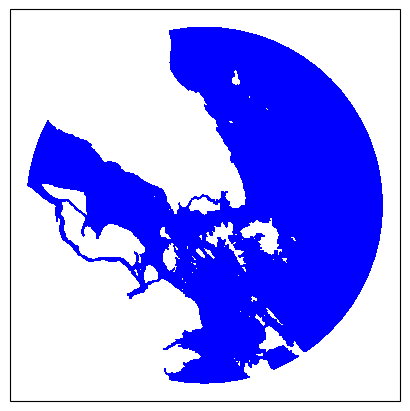

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

vv = ds_WL_dynamic_WindSetUp_UV['mesh2d_s1'].values
time = ds_WL_dynamic_WindSetUp_UV['time'].values

i = 10

X = ds_WL_dynamic_WindSetUp_UV.mesh2d_node_x.values
Y = ds_WL_dynamic_WindSetUp_UV.mesh2d_node_y.values
triangles = ds_WL_dynamic_WindSetUp_UV.mesh2d_face_nodes.values -1
cmap = 'bwr'

vmin = np.nanmin(vv)*0.85
vmax = -vmin
fig, (axs) = plt.subplots(
    nrows=1, ncols=1,
    figsize=figsize, subplot_kw=dict(projection=ccrs.PlateCarree()),
    constrained_layout=True
)


pm = axs.tripcolor(
    X, Y, triangles,
    facecolors = vv[i,:],
    cmap=cmap,
    vmin=vmin, vmax=vmax,
    shading = 'flat',transform=ccrs.PlateCarree()
    #zorder=0,
)

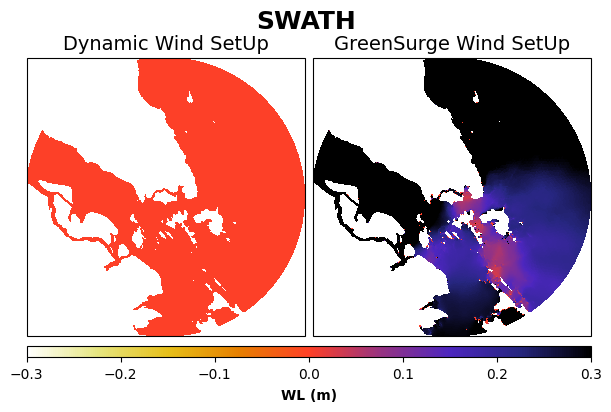

In [12]:
from bluemath_tk.additive.greensurge import plot_GS_vs_dynamic_windsetup_swath

plot_GS_vs_dynamic_windsetup_swath(
    ds_WL_GS_WindSetUp = xds_GS_wind, ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp_UV, ds_gfd_metadata = ds_GFD_info, vmin=-0.3, vmax=0.3, figsize=figsize,
)

In [9]:
ds_WL_dynamic_WindSetUp_UV

<xarray.Dataset> Size: 3GB
Dimensions:             (mesh2d_nNodes: 219732, mesh2d_nEdges: 642034, Two: 2,
                         mesh2d_nFaces: 421998, mesh2d_nMax_face_nodes: 3,
                         time: 83)
Coordinates:
    mesh2d_node_x       (mesh2d_nNodes) float64 2MB 103.4 103.4 ... 101.9 102.2
    mesh2d_node_y       (mesh2d_nNodes) float64 2MB -0.4667 -0.4638 ... 1.201
    mesh2d_edge_x       (mesh2d_nEdges) float64 5MB ...
    mesh2d_edge_y       (mesh2d_nEdges) float64 5MB ...
    mesh2d_face_x       (mesh2d_nFaces) float64 3MB ...
    mesh2d_face_y       (mesh2d_nFaces) float64 3MB ...
  * time                (time) datetime64[ns] 664B 2001-12-26T12:00:00 ... 20...
Dimensions without coordinates: mesh2d_nNodes, mesh2d_nEdges, Two,
                                mesh2d_nFaces, mesh2d_nMax_face_nodes
Data variables: (12/20)
    wgs84               int32 4B ...
    mesh2d              int32 4B ...
    mesh2d_node_z       (mesh2d_nNodes) float64 2MB ...
    mesh2d_edge_nodes   (mesh2d_nEdges, Two) int32 5MB ...
    mesh2d_face_nodes   (mesh2d_nFaces, mesh2d_nMax_face_nodes) float64 10MB ...
    mesh2d_edge_faces   (mesh2d_nEdges, Two) float64 10MB ...
    ...                  ...
    mesh2d_waterdepth   (time, mesh2d_nFaces) float64 280MB ...
    mesh2d_ucmag        (time, mesh2d_nFaces) float64 280MB ...
    mesh2d_windx        (time, mesh2d_nFaces) float64 280MB ...
    mesh2d_windy        (time, mesh2d_nFaces) float64 280MB ...
    mesh2d_windxu       (time, mesh2d_nEdges) float64 426MB ...
    mesh2d_windyu       (time, mesh2d_nEdges) float64 426MB ...
Attributes: (12/18)
    institution:               Deltares
    references:                https://www.deltares.nl
    source:                    D-Flow FM 1.2.184.16121e1c11da6767019cb454759d...
    history:                   Created on 2025-06-20T08:53:05+0200, D-Flow FM
    date_created:              2025-06-20T08:53:05+0200
    date_modified:             2025-06-20T08:53:05+0200
    ...                        ...
    geospatial_lon_max:        105.82105569692723
    geospatial_lon_units:      degrees_east
    time_coverage_start:       2001-12-26T12:00:00+00:00
    time_coverage_end:         2001-12-29T23:00:00+00:00
    time_coverage_duration:    P0000-00-03T11:00:00
    time_coverage_resolution:  P0000-00-00T00:15:00

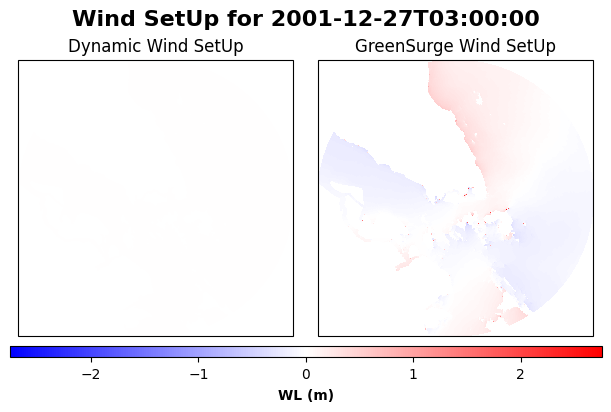

Error in callback <function flush_figures at 0x7fbb4761da80> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [10]:
from bluemath_tk.additive.greensurge import plot_GS_vs_dynamic_windsetup

for i in instant:
    plot_GS_vs_dynamic_windsetup(
        ds_WL_GS_WindSetUp = xds_GS_wind,
        ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp_UV,
        ds_gfd_metadata = ds_GFD_info,
        time = ds_WL_dynamic_WindSetUp_UV.time[i].values,
        figsize = figsize,
    )

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Inverse Barometer</strong><br><br>

  The third stage for any TC event study consist of turning pressure differences into sea level rises and falls using IB methodology which take into account the correlation 1mb-1cm.
</div>


In [ ]:
# from bluemath_tk.additive.greensurge import interp_vortex_to_triangles

# xds_vortex_GS = xr.open_dataset(
#     f"outputs/GreenSurge_vortex_{TCname}.nc",
# )

# lon_all = ds_GFD_info.node_computation_longitude.values

# lat_all = ds_GFD_info.node_computation_latitude.values

# xds_vortex_interp_mesh = interp_vortex_to_triangles(
#     xds_vortex_GS = xds_vortex_GS, lon_all = lon_all, lat_all = lat_all, type = "tri_points"
# )

In [ ]:
from bluemath_tk.additive.greensurge import pressure_to_IB

xds_vortex_GS = xr.open_dataset(
    f"outputs/GreenSurge_vortex_{TCname}.nc",
)

ds_WL_GS_IB = pressure_to_IB(xds_presure = xds_vortex_GS)

ds_WL_dynamic_WindSetUp_UVP = xr.open_dataset(
    "inputs/GreenSurge_GFDcase_UVP_map.nc"
)

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Storm Surge</strong><br><br>

  Finally the fourth stage sums both components, the wind setup and the pressure-induced sea level changes, to obtain the storm surge.
  $$
  \eta_{SS} = \eta_{WindSetUp} + \eta_{IB}
  $$

</div>

<div style="border: 1px solid #cce5ff; background-color: #e9f7fe; padding: 15px; border-radius: 6px; font-family: sans-serif;">
  <strong>🔹 Model validation</strong><br><br>

  The panel below shows timeseries comparison of windsetup at three given locations. These figures illustrate the acuracy of Greensurge approach compared to dynamic simulations.
</div>

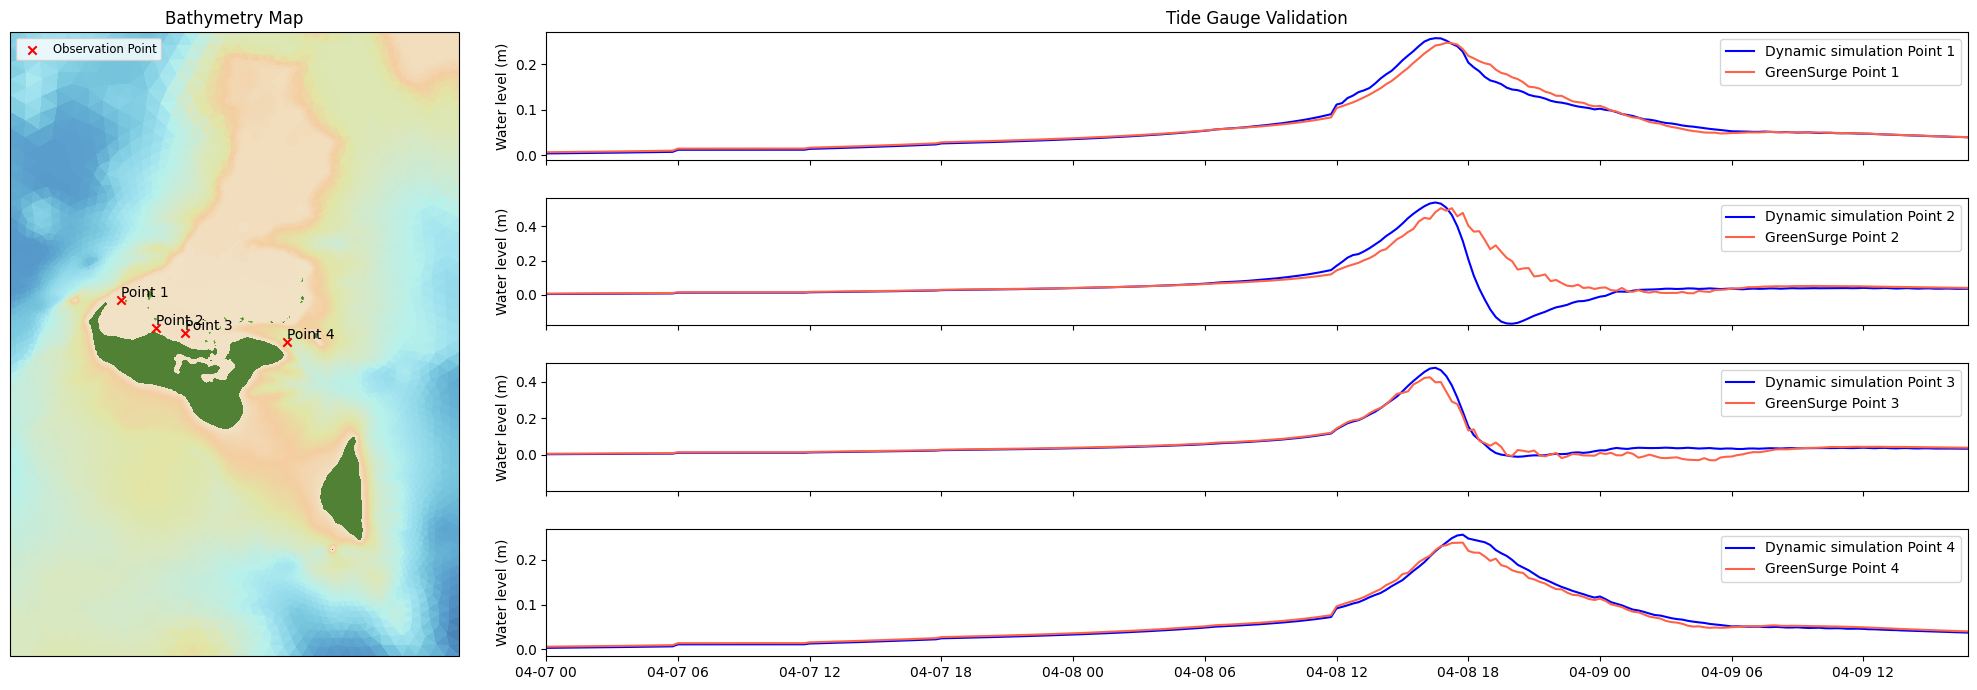

In [ ]:
from bluemath_tk.additive.greensurge import plot_GS_validation_timeseries

plot_GS_validation_timeseries(
    ds_WL_GS_WindSetUp = xds_GS_wind,
    ds_WL_GS_IB = ds_WL_GS_IB,
    ds_WL_dynamic_WindSetUp = ds_WL_dynamic_WindSetUp_UVP,
    ds_GFD_info = ds_GFD_info,
    lon_obs = [-175.30200513384034, -175.24317880217367, -175.1955377589225, -175.02734416274885],
    lat_obs = [-21.059426057898943, -21.105824291326165, -21.11369542021114, -21.129023408039775],
)